#                             ***Fraud Detection Project***
## Anomaly Detection

---

#### Acerca del Dataset
Es importante que las compañías de tarjetas de crédito puedan reconocer las transacciones de tarjetas de crédito fraudulentas para que a los clientes no se les cobre por artículos que no compraron.

#### Contenido
El conjunto de datos contiene transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas Europeos.
Este conjunto de datos presenta transacciones que ocurrieron en dos días, donde tenemos 492 fraudes de 284.807 transacciones. El conjunto de datos está muy desequilibrado, la clase positiva (fraudes) representa el 0,172% de todas las transacciones.

Contiene solo variables de entrada numéricas que son el resultado de una **transformación PCA (Principal Component Analysis).** Desafortunadamente, debido a problemas de confidencialidad, no se puede proporcionar las características originales ni más información general sobre los datos. Las características V1, V2, …, V28 son los principales componentes obtenidos con PCA, las únicas características que no han sido transformadas con PCA son 'Tiempo' y 'Cantidad'.
La característica 'Tiempo' contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos. 
La característica 'Cantidad' es el monto de la transacción. 
La característica 'Class' es la variable de respuesta que toma valor 1 en caso de fraude y 0 en caso contrario.

---

---

**Introduccion**

En el siguiente proyecto procedemos a realizar un analisis de un DataSet con informacion sobre operaciones de tarjetas de credito de diferentes usuarios con el objetivo de identificar cualquier tipo de operacion fraudulenta. 
Realizaremos el estudio haciendo uso del algoritmo que se centra en "Anomaly Detection"

Los metodos de fraude con tarjetas de credito se han vuelto cada vez mas sofisticados, usando tecnologias avanzadas. Hoy en dia, identificar valores atipicos o "outliers" es sumamente importante para poder prevenir a clientes de posibles robos en sus cuentas o a delincuentes que realizen operaciones fraudulentas. Por lo tanto, el uso de algoritmos de Machine Learning se vuelve imperativo cuando tratamos de datos financieros o datos confidenciales de clientes, ya que estos algoritmos pueden analizar volumenes de datos inmensos, incluyendo texto, imagenes, videos, audios y demas, para detectar un patron o anomalia en segundos con alta precesion. 

---


## Analisis Exploratorio de Datos

Primero vamos a importar los paquetes que necesitaremos para realizar todas las acciones relativas al analisis de los datos y posterior visualizacion.

**Numpy** es el paquete fundamental para trabajar con matrices en Python.

**Pandas** es una muy popular librería dentro del ámbito de Data Science y Machine Learning, ya que facilitan la manipulación y tratamiento de datos.

**Matplotlib** es una biblioteca famosa para trazar gráficos en Python.
%matplotlib inline hara que las visualizaciones se puedan ver en el mismo proyecto.

**Utils.py** contiene funciones auxiliares para esta tarea.

**Seaborn** es una librería de visualización de datos desarrollada sobre matplotlib. Ofrece una interfaz de alto nivel para la creación de atractivas gráficas.

In [1]:
pip install fast_ml

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from utils import *
from matplotlib.pyplot import figure
import random as rnd
from sklearn.metrics import confusion_matrix
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score , average_precision_score
from sklearn.metrics import precision_score, precision_recall_curve
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import train_test_split
from fast_ml.model_development import train_valid_test_split

### Importación de dataset como Dataframe.

In [4]:
df = pd.read_csv('creditcard.csv')

En la celda siguiente veremos los primeros 5 valores de nuestro Dataset:

In [5]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### La columna 'Time' como dijimos, son los segundos transcurridos desde la primer transaccion hasta la operacion en cuestion. Esta "Feature" no nos aporta informacion relevante asi que la eliminaremos para ser mas practicos. 

In [7]:
df = df.drop(['Time'], axis=1)

In [8]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Veo si hay NULL values (Valores nulos)


In [9]:
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

#### Ahora ya tenemos el dataset sin valores nulos.

#### Vemos cuantos valores tenemos:

In [12]:
num_rows = df.shape[0]
print('Cada variable presenta la siguiente cantidad de datos:',num_rows)

Cada variable presenta la siguiente cantidad de datos: 284807


#### Y la cantidad de columnas del dataset:

In [13]:
num_cols = len(df.columns)
num_cols
print('Cantidad de columnas del dataset:',num_cols)

Cantidad de columnas del dataset: 30


### Pasamos a analizar caracteristicas mas estadisticas de nuestro dataset que nos serviran mas adelante para poder detectar las anomalias

In [14]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


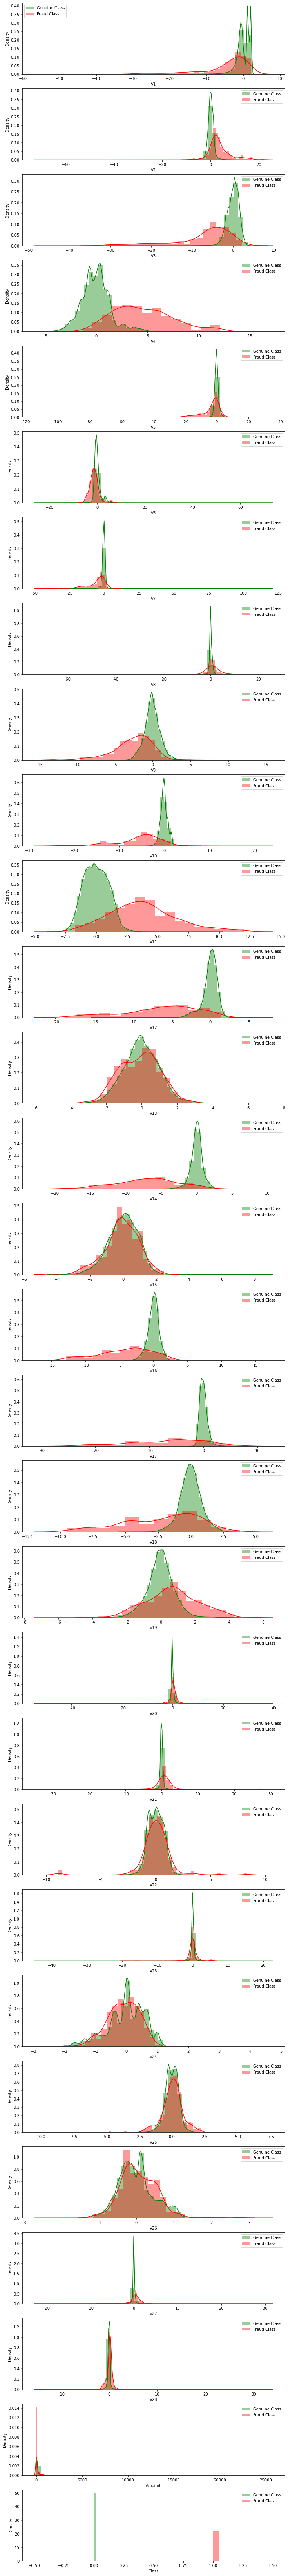

In [15]:
# Visualización de datos para verificar la distribución de casos NO fraudulentos y 
# casos de fraude para cada característica

v_features = df.columns
plt.figure(figsize=(12,31*4))
gs = gridspec.GridSpec(31,1)

for i, col in enumerate(v_features):
    ax = plt.subplot(gs[i])
    sns.distplot(df[col][df['Class']==0],color='g',label='Genuine Class')
    sns.distplot(df[col][df['Class']==1],color='r',label='Fraud Class')
    ax.legend()
plt.show()

### Feature selection:
Podemos ver que la distribución normal de transacciones anómalas (clase = 1) coincide con la distribución normal de transacciones genuinas (clase = 0) para 'V13','V15','V20','V22','V23','V24','V25', 'V26', 'V27', 'V28'. Es mejor eliminar estas funciones, ya que pueden no ser útiles para encontrar registros anómalos.

In [16]:
df.drop(labels = ['V13','V15','V20','V22','V23','V24','V25', 'V26', 'V27', 'V28'], axis = 1, inplace=True)
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Amount', 'Class'],
      dtype='object')

Las siguientes columnas no tienen la misma distribución para registros genuinos vs. fraude. Sin embargo, la distribución de registros de fraude tampoco es inusual. Por lo tanto, vamos a eliminar estas columnas, ya que las "features" con un comportamiento inusual en los registros de fraude, serán más útiles en el Anomaly Detection Algorithm.

In [17]:
df.drop(labels = ['V1','V2','V5','V6','V7','V8','V21','Amount'], axis = 1, inplace=True)
df.columns

Index(['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18',
       'V19', 'Class'],
      dtype='object')

#### Ahora vamos a visualizar las columnas que nos quedaron en un grafico tipo 'Pair Plot' para comprender la relacion entre estas.

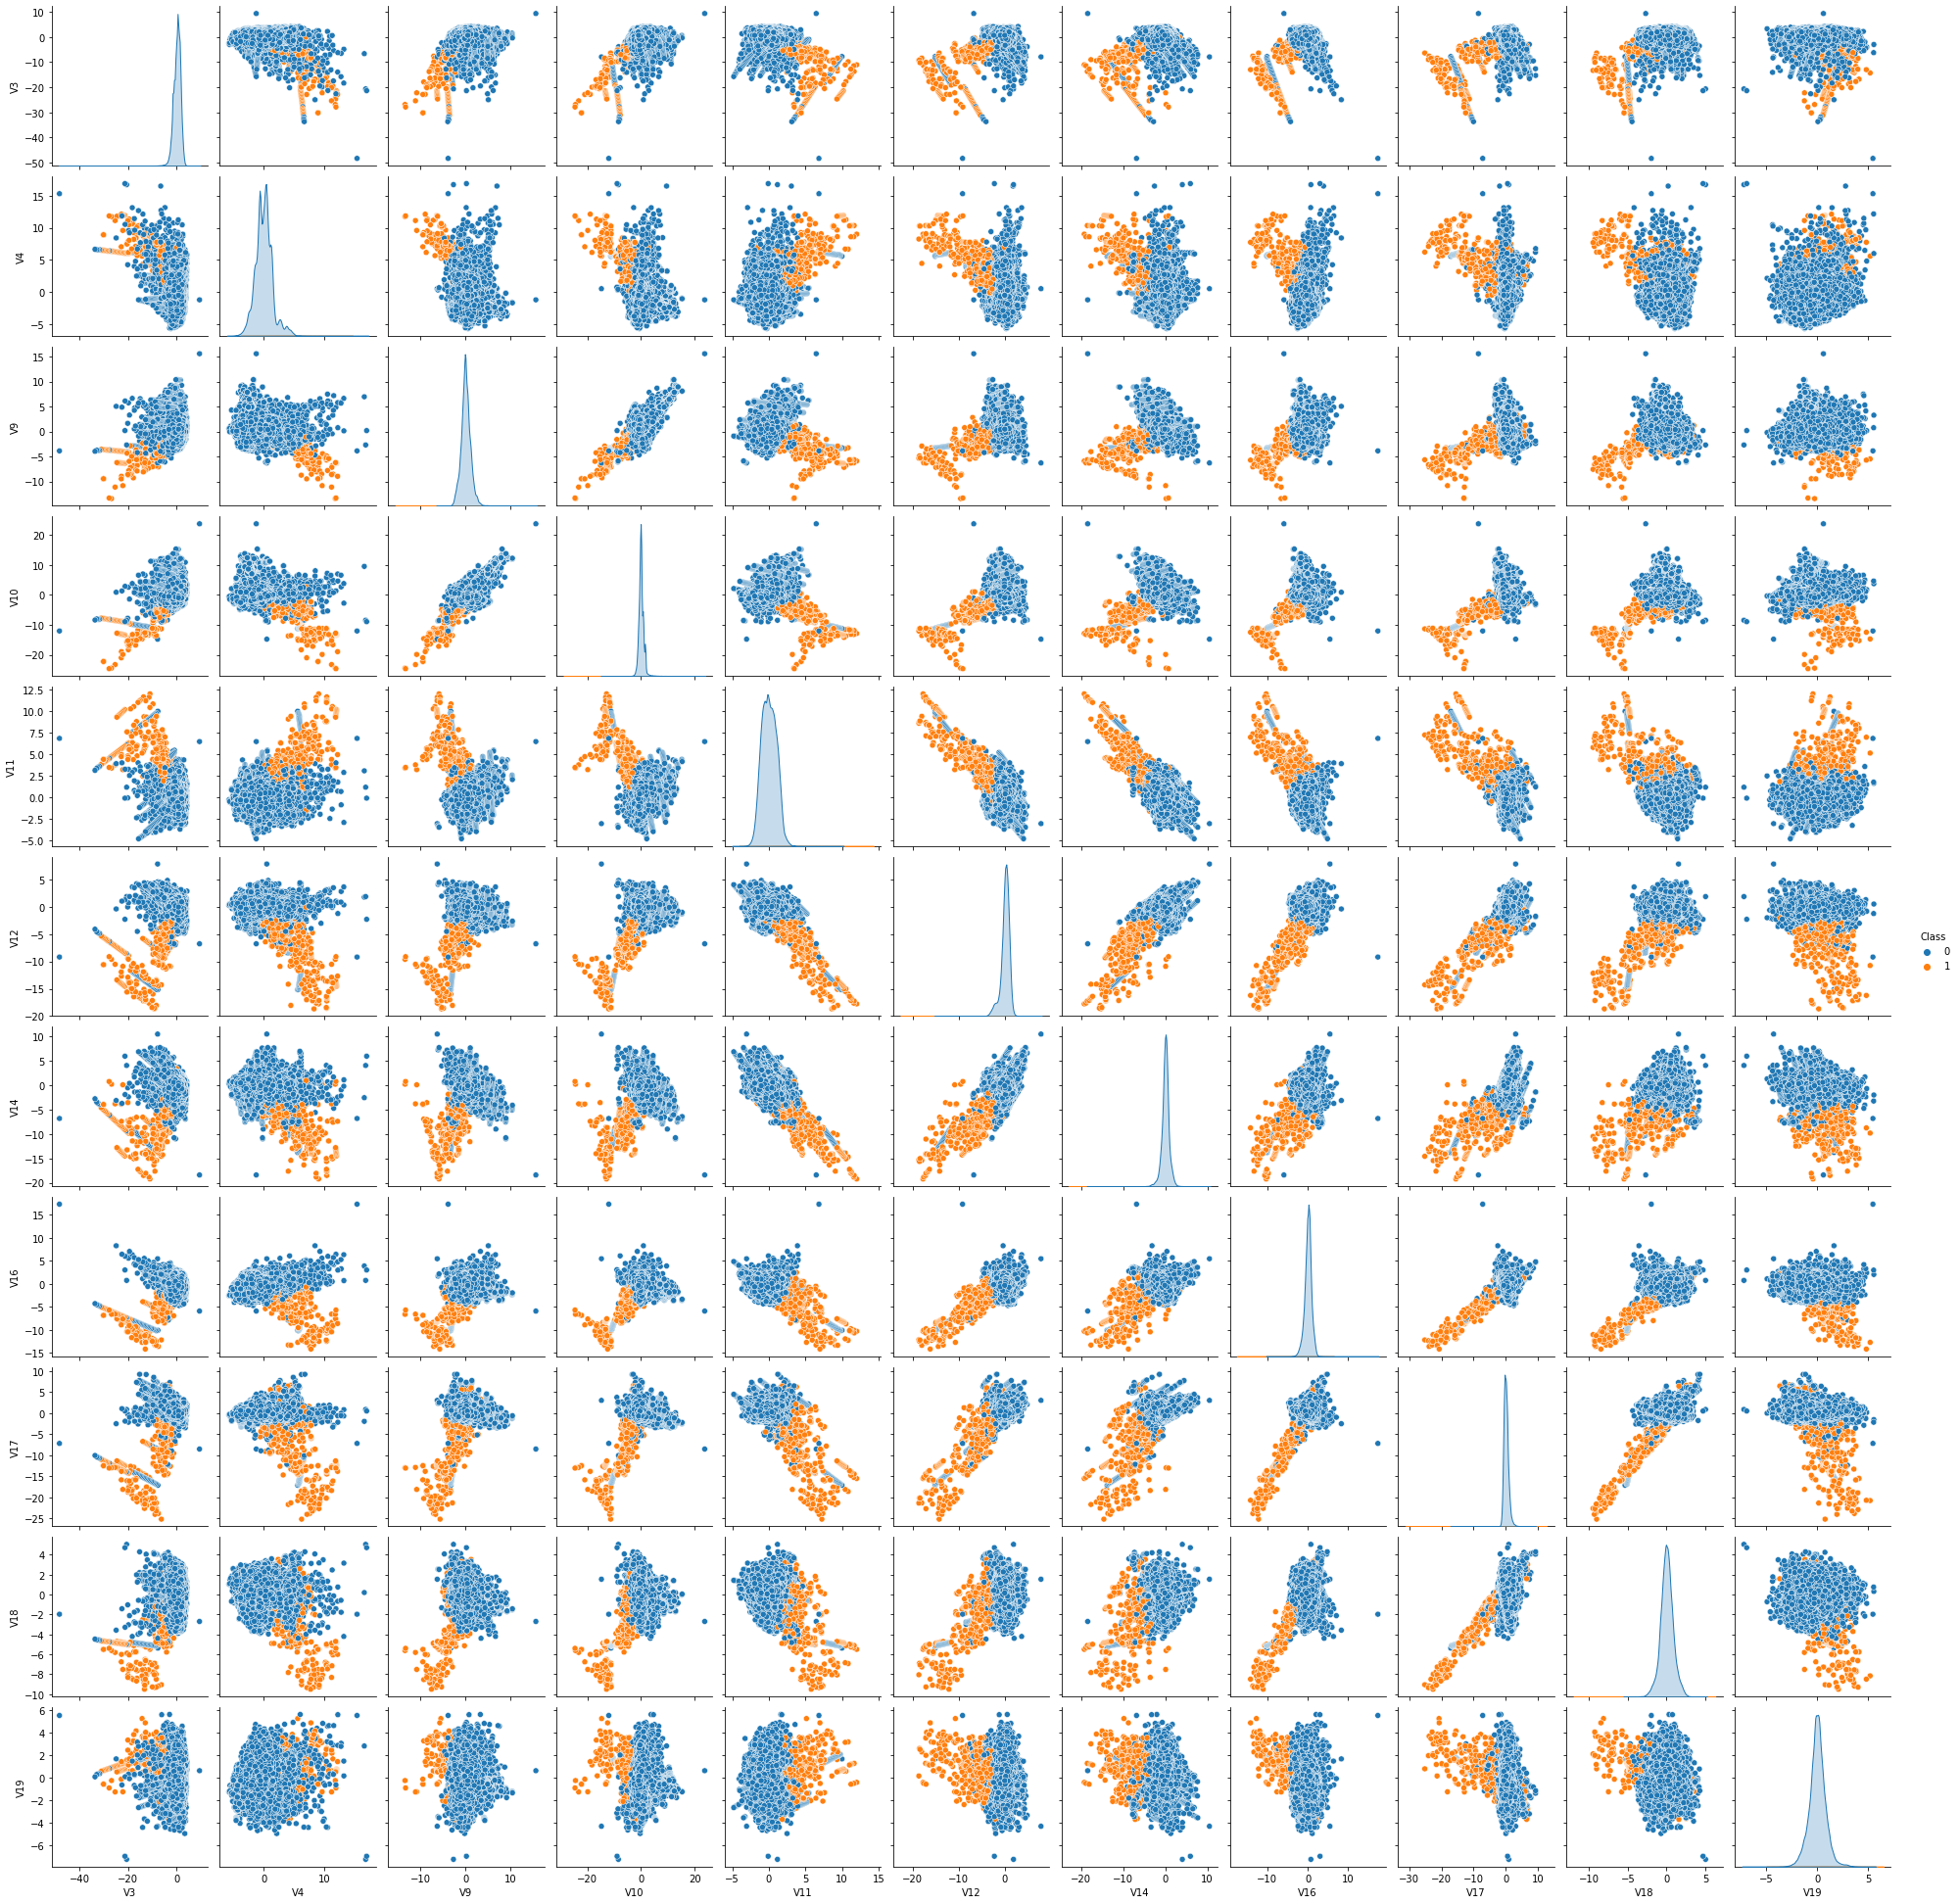

In [18]:
sns.pairplot(df,hue="Class",diag_kind='kde')

No hay mucha información del 'Pair Plot', excepto que la mayoría de las características tienen una clara separación entre los registros de fraude y los registros NO fraudulentos (genuinos). Podemos notar que la distribución de los registros de fraude es bastante diferente en comparación con los registros genuinos en los diagramas de la diagonal. Todas las características parecen estar normalmente distribuidas, por ende podemos entrenar el algoritmo de Distribución Guassiana Multivariante usando las características originales.

In [19]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

#### Aca podemos ver que la columna 'Class' es una variable binaria que toma valores 0 y 1.  0 si la operacion no es fraudulenta y 1 si lo es. Como vemos, tenemos 492 operaciones fraudulentas dentro de las 284.807 operaciones registradas.

---

Las transacciones fraudulentas proporcionadas contribuyen en solo un 0,17%, lo que indica que tenemos datos muy desequilibrados en los que trabajar.
La técnica de 'Supervised Classification' no es la candidata perfecta para datos altamente desequilibrados.

Si pensamos desde la perspectiva de construir el modelo para descubrir los datos anómalos que no se ven con mucha frecuencia, deberíamos optar por la técnica de detección de anomalías utilizando la distribución Gaussiana.

---

#### Vamos a ordenar los datos y armar distintos subsets de datos donde tengamos X_train, X_val1 (para la cross validation) y X_test1 (para la prueba final)

In [20]:
# Ordenamos el dataset en base a la variable 'Class' que puede ser 0 (No fraudulento) o 1 (fraudulento)
df = df.sort_values(by='Class')

In [21]:
df = df.reset_index()

In [22]:
df = df.drop(df.columns[0], axis=1)

In [23]:
df

,V3,V4,V9,V10,V11,V12,V14,V16,V17,V18,V19,Class
0,2.536347,1.378155,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0
1,-2.698260,4.886691,-3.150815,1.143182,-0.705144,-0.074544,2.219106,0.397685,0.580084,0.844710,2.133181,0
2,-2.440339,-0.280203,0.054811,0.201116,0.482470,0.423504,1.079802,-0.239694,-0.686932,0.226090,0.610772,0
3,3.113868,4.420894,-1.676275,1.465244,0.530256,-0.340789,-0.001109,0.874548,-0.432920,1.550215,1.074173,0
4,-2.215079,0.511939,0.540116,-0.615062,-0.809022,0.097478,-0.926483,0.381075,0.255910,0.659978,-0.313816,0
...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-12.423635,7.519929,-7.383705,-13.215172,6.895181,-13.279700,-13.417012,-10.922655,-21.906493,-8.829820,1.852467,1
284803,-1.601052,2.813401,-1.496495,-4.056293,1.553756,-2.743551,-5.428788,-3.727188,-3.946300,-1.680286,2.303613,1
284804,-19.026912,11.165526,-7.175097,-14.166795,10.277769,-14.985434,-14.666389,-8.333242,-12.602596,-4.876683,0.604626,1
284805,-6.161997,5.543972,-2.959806,-3.851722,4.513355,-4.858312,-10.006243,0.574875,0.188470,1.649224,-1.796739,1


In [24]:
# Vemos que tenemos 492 operaciones fraudulentas del total.
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [25]:
# Definimos el subset de datos para entrenar el modelo, agarrando un 60% de los datos NO anomalos.
# Datos no anomalos = 284315
# X_train = 
X_train = df.loc[0:170588]

In [26]:
# Verificamos que no haya ningun dato anomalo.
X_train['Class'].value_counts()

0    170589
Name: Class, dtype: int64

In [27]:
# Definimos otro subset de datos que usaremos en la validacion del modelo (Cross Validation), del 20% restante
# de datos, luego le agregaremos la mitad de los datos anomalos
X_val = df.loc[170589:227451]

In [28]:
X_val['Class'].value_counts()

0    56863
Name: Class, dtype: int64

In [29]:
# Hacemos lo mismo con X_test, que nos servira para la evaluacion final.
X_test = df.loc[227452:284314]

In [30]:
X_test['Class'].value_counts()

0    56863
Name: Class, dtype: int64

In [31]:
# Definimos el set de datos anomalos que se le agregara a X_val
X_val_y_anomaly = df.loc[284315:284560]

In [32]:
X_val_y_anomaly['Class'].value_counts()

1    246
Name: Class, dtype: int64

In [33]:
# Definimos el set de datos anomalos que se le agregara a X_test
X_test_y_anomaly = df.loc[284561:]

In [34]:
X_test_y_anomaly['Class'].value_counts()

1    246
Name: Class, dtype: int64

In [35]:
len(X_train)

170589

In [36]:
# Unimos los dos conjuntos de datos y obtenemos X_val1 que contiene una porcion de datos NO anomalos y la mitad
# de los anomalos.
X_val1 = X_val.append(X_val_y_anomaly)

In [37]:
X_val1['Class'].value_counts()

0    56863
1      246
Name: Class, dtype: int64

In [38]:
len(X_val1)

57109

In [39]:
# Realizamos lo mismo y obtenemos X_test1
X_test1 = X_test.append(X_test_y_anomaly)

In [40]:
X_test1['Class'].value_counts()

0    56863
1      246
Name: Class, dtype: int64

In [41]:
len(X_test1)

57109

In [42]:
# Vamos a sacar la columna 'Class' de X_train.
X_train = X_train.drop(['Class'], axis=1)

In [43]:
X_train.head()

,V3,V4,V9,V10,V11,V12,V14,V16,V17,V18,V19
0,2.536347,1.378155,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993
1,-2.698260,4.886691,-3.150815,1.143182,-0.705144,-0.074544,2.219106,0.397685,0.580084,0.844710,2.133181
2,-2.440339,-0.280203,0.054811,0.201116,0.482470,0.423504,1.079802,-0.239694,-0.686932,0.226090,0.610772
3,3.113868,4.420894,-1.676275,1.465244,0.530256,-0.340789,-0.001109,0.874548,-0.432920,1.550215,1.074173
4,-2.215079,0.511939,0.540116,-0.615062,-0.809022,0.097478,-0.926483,0.381075,0.255910,0.659978,-0.313816


In [44]:
Y_val1 = X_val1['Class']

In [45]:
len(Y_val1)

57109

In [46]:
Y_val1

170589    0
170590    0
170591    0
170592    0
170593    0
         ..
284556    1
284557    1
284558    1
284559    1
284560    1
Name: Class, Length: 57109, dtype: int64

In [47]:
# Vamos a sacar la columna 'Class' de X_val1.
X_val1 = X_val1.drop(['Class'], axis=1)
X_val1.head()

,V3,V4,V9,V10,V11,V12,V14,V16,V17,V18,V19
170589,-0.596064,0.911131,-0.683610,0.024366,-0.576376,0.406957,1.073254,-0.630828,0.457562,-0.518437,-0.015425
170590,1.572719,-0.357242,0.567494,0.354001,0.847849,0.323287,-0.966246,0.206728,1.253883,-1.667229,0.551347
170591,1.675514,-0.591395,-0.217973,-0.492612,-0.505685,-0.074232,-1.037813,0.630754,-0.737104,-0.173009,-0.629431
170592,1.661025,-0.095916,-0.600116,-0.130997,1.403644,0.461220,0.442399,0.357117,-0.543534,0.132922,0.229273
170593,0.367276,-1.220376,-1.640361,1.332747,1.200293,-0.176875,-0.190119,-1.238984,1.288386,-0.714330,-0.296314


In [48]:
Y_test1 = X_test1['Class']

In [49]:
len(Y_test1)

57109

In [50]:
Y_test1

227452    0
227453    0
227454    0
227455    0
227456    0
         ..
284802    1
284803    1
284804    1
284805    1
284806    1
Name: Class, Length: 57109, dtype: int64

In [51]:
# Vamos a sacar la columna 'Class' de X_test1.
X_test1 = X_test1.drop(['Class'], axis=1)
X_test1.head()

,V3,V4,V9,V10,V11,V12,V14,V16,V17,V18,V19
227452,0.921652,-0.693481,-0.177094,0.655602,1.278643,-0.571556,-0.039570,0.769665,0.768732,-1.250466,0.058625
227453,1.321142,0.713548,-0.133945,-0.373589,0.568251,0.776751,0.141048,-1.124880,1.077044,-0.811907,1.037121
227454,0.845396,0.765161,-0.042591,0.838773,0.270530,0.658243,-0.325728,-0.804123,-0.210195,0.070356,1.393440
227455,0.671463,1.266396,-0.158576,-0.058439,0.304427,1.004370,0.147470,-0.029552,-0.344977,-0.470937,-0.595867
227456,0.778241,0.611723,-0.957505,0.905041,1.300543,0.304968,0.394154,-1.143745,-0.205532,1.650073,-1.583911


In [52]:
X_train = X_train.to_numpy()
X_train

array([[ 2.53634674,  1.37815522,  0.36378697, ...,  0.20797124,
         0.02579058,  0.40399296],
       [-2.6982604 ,  4.88669118, -3.15081499, ...,  0.58008402,
         0.84470995,  2.13318063],
       [-2.44033908, -0.2802033 ,  0.05481116, ..., -0.68693152,
         0.22609038,  0.61077228],
       ...,
       [ 0.42174234,  0.71659542, -0.04776862, ...,  0.37096329,
        -0.89825927, -0.68188571],
       [-2.88576485,  1.71210166, -0.34393781, ...,  3.00628739,
         1.79327307, -0.25450925],
       [-0.20428654, -0.97903567, -1.76696317, ...,  1.47645057,
        -0.85228611,  1.21971582]])

In [53]:
len(X_train)

170589

In [54]:
X_val = X_val1.to_numpy()
X_val

array([[ -0.59606368,   0.91113118,  -0.68360958, ...,   0.45756214,
         -0.51843666,  -0.01542526],
       [  1.57271857,  -0.35724165,   0.567494  , ...,   1.25388271,
         -1.66722862,   0.55134694],
       [  1.67551403,  -0.59139535,  -0.21797276, ...,  -0.73710439,
         -0.1730086 ,  -0.62943069],
       ...,
       [ -3.4324582 ,   3.98651893,  -2.43541565, ...,   6.44364914,
          1.59253819,  -3.68190355],
       [ -7.57235582,   5.17781926,  -3.74059751, ..., -12.50393097,
         -4.37563101,   2.46519487],
       [ -5.61515901,   6.0474451 ,  -2.67867854, ...,   0.7844266 ,
          1.49430461,  -1.80801216]])

In [55]:
len(X_val)

57109

In [56]:
Y_val = Y_val1.to_numpy()
Y_val

array([0, 0, 0, ..., 1, 1, 1])

In [57]:
len(Y_val)

57109

In [58]:
X_test = X_test1.to_numpy()
X_test

array([[  0.92165248,  -0.69348068,  -0.17709449, ...,   0.76873173,
         -1.2504664 ,   0.05862536],
       [  1.32114199,   0.71354825,  -0.13394467, ...,   1.07704426,
         -0.81190715,   1.03712135],
       [  0.84539619,   0.76516085,  -0.04259139, ...,  -0.21019484,
          0.07035575,   1.39344036],
       ...,
       [-19.02691234,  11.16552584,  -7.17509662, ..., -12.60259646,
         -4.87668342,   0.60462591],
       [ -6.16199733,   5.54397248,  -2.95980628, ...,   0.18846955,
          1.64922352,  -1.79673863],
       [ -0.74840625,   0.69499204,   1.72418428, ...,   2.3470229 ,
          1.69122   ,  -0.73611069]])

In [59]:
len(X_test)

57109

In [60]:
Y_test = Y_test1.to_numpy()
Y_test

array([0, 0, 0, ..., 1, 1, 1])

In [61]:
len(Y_test)

57109

In [62]:
print ('The shape of X_train is:', X_train.shape)
print ('The shape of X_val is:', X_val.shape)
print ('The shape of Y_val is:', Y_val.shape)
print ('The shape of X_test is:', X_test.shape)
print ('The shape of Y_test is:', Y_test.shape)

The shape of X_train is: (170589, 11)
The shape of X_val is: (57109, 11)
The shape of Y_val is: (57109,)
The shape of X_test is: (57109, 11)
The shape of Y_test is: (57109,)


<a name="2.3"></a>
### Distribucion Gaussiana

Para realizar la detección de anomalías, primero debemos ajustar un modelo a la distribución de los datos.

* Dado el set de datos V_train $\{V^{(1)}, ..., V^{(m)}\}$ queremos estimar la distribucion Gaussiana para cada uno de ellos.

* Recordamos que la distribución Gaussiana está dada por:

   $$ p(x ; \mu,\sigma ^2) = \frac{1}{\sqrt{2 \pi \sigma ^2}}\exp^{ - \frac{(x - \mu)^2}{2 \sigma ^2} }$$

   Donde $\mu$ es la media y $\sigma^2$ es la varianza.
   
* Para cada característica $i = 1\ldots n$, tenemos que encontrar los parametros $\mu_i$ y $\sigma_i^2$ que se ajustan a los datos en la $i$-esima dimensión $\{x_i^{(1)}, ..., x_i^{(m)}\}$ (la $i$-ésima dimensión de cada ejemplo).



Podemos estimar los parametros, ($\mu_i$, $\sigma_i^2$), de la $i$-esima
caracteristica usando las siguientes ecuaciones. 
Para estimar la media vamos a usar:

$$\mu_i = \frac{1}{m} \sum_{j=1}^m x_i^{(j)}$$

Y para la varianza:
$$\sigma_i^2 = \frac{1}{m} \sum_{j=1}^m (x_i^{(j)} - \mu_i)^2$$


In [63]:
def estimate_gaussian(X):
    
    """
    Calcula la media y la varianza de todas las características en el conjunto de datos
    
    Argumentos:
        X (ndarray): (m, n) Matriz de datos
    
    Devuelve:
        mu (ndarray): (n,) Media de todas las características
        var (ndarray): (n,) Varianza de todas las características
    """

    m, n = X.shape    
    mu = (1 / m) * np.sum(X, axis = 0)
    var = (1 / m) * np.sum((X - mu) ** 2, axis = 0)
        
    return mu, var

In [64]:
mu_X_train, var_X_train = estimate_gaussian(X_train)              

print("Media de cada característica de X_train:", mu_X_train)
print("Varianza de cada característica X_train:", var_X_train)

Media de cada característica de X_train: [-0.4434036  -0.09869303  0.04079016  0.03171277 -0.15650934  0.01573779
 -0.02404001  0.01092988 -0.02354926  0.05556336  0.01038452]
Varianza de cada característica X_train: [2.13509593 2.11815988 1.17442938 1.12796256 0.90657975 0.81648921
 0.84063684 0.72173909 0.53811949 0.68828883 0.66775316]


In [65]:
mu_X_val, var_X_val = estimate_gaussian(X_val)              

print("Media de cada característica de X_val:", mu_X_val)
print("Varianza de cada característica X_val:", var_X_val)

Media de cada característica de X_val: [ 0.67491279  0.17722246  0.06347215 -0.06104699  0.34323588 -0.26029577
  0.14170411 -0.01397289  0.08828667 -0.07860051 -0.02970464]
Varianza de cada característica X_val: [2.01596037 1.89327254 1.40234975 1.31795061 1.22430917 1.71389174
 1.23385111 0.89435351 1.159107   0.73914506 0.65969235]


In [66]:
mu_X_test, var_X_test = estimate_gaussian(X_test)              

print("Media de cada característica de X_test:", mu_X_test)
print("Varianza de cada característica X_test:", var_X_test)

Media de cada característica de X_test: [ 0.64956807  0.11758127 -0.18531552 -0.0336815   0.12426964  0.21328577
 -0.06989475 -0.01867549 -0.01794322 -0.08737154 -0.00131472]
Varianza de cada característica X_test: [1.60701379 1.70277    1.06554194 1.21749998 1.05703786 0.71230489
 0.81104693 0.77801506 0.82124797 0.685455   0.64920584]


### Seleccionando el valor de  $\epsilon$

Ahora que estimamos los parámetros gaussianos, podemos investigar qué ejemplos tienen una probabilidad muy alta dada esta distribución y qué ejemplos tienen una probabilidad muy baja.  

* Es más probable que los datos de baja probabilidad sean anomalías en nuestro dataset.
* Una forma de determinar qué ejemplos son anomalías es seleccionar un umbral basado en un cross validation set. 

Ahora vamos a armar la funcion `select_threshold` para seleccionar el umbral $\varepsilon$ utilizando la $F_1$ score en un cross validation set.

* Para ello, utilizaremos un cross validation set
$\{(x_{\rm val}^{(1)}, y_{\rm val}^{(1)}),\ldots, (x_{\rm val}^{(m_{\rm val} )}, y_{\rm val}^{(m_{\rm val})})\}$, donde el label $y=1$ corresponde a un ejemplo anómalo, e $y=0$ corresponde a un ejemplo normal .
* Para cada dato del CV set, calcularemos $p(x_{\rm val}^{(i)})$. El vector de todas estas probabilidades $p(x_{\rm val}^{(1)}), \ldots, p(x_{\rm val}^{(m_{\rm val)}})$ ingresara a `select_threshold` en el vector `p_val`.
* El vector correspondiente a $y_{\rm val}^{(1)}, \ldots, y_{\rm val}^{(m_{\rm val)}}$ ingresa a la misma función en el vector `y_val `.

* Necesitamos implementar una linea de codigo paara calcular el F1 score haciendo uso de `epsilon` como el limite y ingresarlo a `F1`. 

  * Recordemos que si un ejemplo $x$ tiene una probabilidad baja $p(x) < \varepsilon$, entonces se clasificara como anomalo.
        
  * Luego, podemos calcular la precision y la recall mediante: 
   $$\begin{aligned}
   prec&=&\frac{tp}{tp+fp}\\
   rec&=&\frac{tp}{tp+fn},
   \end{aligned}$$ where
    * $tp$ es el numero de true positives
    * $fp$ es el numero de false positives
    * $fn$ es el numero de false negatives

  * El $F_1$ score lo obtenemos usando precision ($prec$) y recall ($rec$) de la siguiente forma:
    $$F_1 = \frac{2\cdot prec \cdot rec}{prec + rec}$$ 

In [67]:
"""


def select_threshold(Y_val, p_val): 

.........
    Encuentra el mejor umbral (epsilon) a utilizar para seleccionar los valores atípicos
    basado en los resultados de un conjunto de validación (p_val) y los valores reales (y_val)
    
    Argumentos:
        y_val (ndarray): Ground truth en el validation set
        p_val (ndarray): 
        
    Obtenemos:
        epsilon (float): Limite elegido.
        F1 (float):      F1 score eligiendo epsilon como limite.
.........

    best_epsilon = 0
    best_F1 = 0
    F1 = 0
    
    step_size = (max(p_val) - min(p_val)) / 10000000
    
    for epsilon in np.arange(min(p_val), max(p_val), step_size):
        
        predictions = (p_val < epsilon)
        
        tp = np.sum((predictions == 1) & (Y_val == 1))
        fp = np.sum((predictions == 1) & (Y_val == 0))
        fn = np.sum((predictions == 0) & (Y_val == 1))
        
        prec = tp / (tp + fp)
        rec = rec = tp / (tp + fn)
        
        F1 = 2 * prec * rec / (prec + rec)

        if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon
        
    return best_epsilon, best_F1

"""

'\n\n\ndef select_threshold(Y_val, p_val): \n\n.........\n    Encuentra el mejor umbral (epsilon) a utilizar para seleccionar los valores atípicos\n    basado en los resultados de un conjunto de validación (p_val) y los valores reales (y_val)\n    \n    Argumentos:\n        y_val (ndarray): Ground truth en el validation set\n        p_val (ndarray): \n        \n    Obtenemos:\n        epsilon (float): Limite elegido.\n        F1 (float):      F1 score eligiendo epsilon como limite.\n.........\n\n    best_epsilon = 0\n    best_F1 = 0\n    F1 = 0\n    \n    step_size = (max(p_val) - min(p_val)) / 10000000\n    \n    for epsilon in np.arange(min(p_val), max(p_val), step_size):\n        \n        predictions = (p_val < epsilon)\n        \n        tp = np.sum((predictions == 1) & (Y_val == 1))\n        fp = np.sum((predictions == 1) & (Y_val == 0))\n        fn = np.sum((predictions == 0) & (Y_val == 1))\n        \n        prec = tp / (tp + fp)\n        rec = rec = tp / (tp + fn)\n        \n

In [68]:
"""

p = multivariate_normal.pdf(X_train, mu_X_train, var_X_train)


p_val = multivariate_normal.pdf(X_val, mu_X_val, var_X_val)


epsilon, F1 = select_threshold(Y_val, p_val)

print('Best epsilon found using cross-validation: %e'% epsilon)
print('Best F1 on Cross Validation Set:  %f'% F1)
print('# Anomalies found: %d'% sum(p < epsilon))

"""

"\n\np = multivariate_normal.pdf(X_train, mu_X_train, var_X_train)\n\n\np_val = multivariate_normal.pdf(X_val, mu_X_val, var_X_val)\n\n\nepsilon, F1 = select_threshold(Y_val, p_val)\n\nprint('Best epsilon found using cross-validation: %e'% epsilon)\nprint('Best F1 on Cross Validation Set:  %f'% F1)\nprint('# Anomalies found: %d'% sum(p < epsilon))\n\n"

In [69]:
#Method for selecting epsilon with best F1-score
def SelectThresholdByCV_Anomaly(probs,y):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    precision =0
    recall=0
    best_recall = 0
    best_precision = 0
    
    epsilons = sorted(np.unique(probs))
    #print(epsilons)
    
    precisions=[]
    recalls=[]
    for epsilon in epsilons:
        predictions = (probs < epsilon)
        f = f1_score(y, predictions)
        precision = precision_score(y, predictions)
        recall = recall_score(y, predictions)
        #print("Theshold {0},Precision {1},Recall {2}".format(epsilon,precision,recall))
          
        if f > best_f1:
            best_f1 = f
            best_precision = precision
            best_recall = recall
            best_epsilon = epsilon
        
        precisions.append(precision)
        recalls.append(recall)

    #Precision-Recall Trade-off
    plt.plot(epsilons,precisions,label='Precision')
    plt.plot(epsilons,recalls,label='Recall')
    plt.xlabel("Epsilon")
    plt.title('Precision Recall Trade Off')
    plt.legend()
    plt.show()

    print ('Best F1 Score %f' %best_f1)
    print ('Best Precision Score %f' %best_precision)
    print ('Best Recall Score %f' %best_recall)
    print ('Best Epsilon', best_epsilon)

In [70]:
# Lo elevo a la 1/100 porque son valores demasiado chicos y no se ve bien en el grafico
p_X_train = (multivariate_normal.pdf(X_train, mu_X_train, var_X_train))**(1/100)
p_X_train

array([0.87587984, 0.74617784, 0.88113632, ..., 0.88707973, 0.74150229,
       0.83202536])

In [71]:
p_X_val = (multivariate_normal.pdf(X_val, mu_X_train, var_X_train))**(1/100)
p_X_val

array([0.88672873, 0.85131953, 0.87870171, ..., 0.33493201, 0.02040823,
       0.21552765])

In [72]:
p_X_test = (multivariate_normal.pdf(X_test, mu_X_train, var_X_train))**(1/100)
p_X_test

array([0.86772963, 0.86164529, 0.87727008, ..., 0.        , 0.2836769 ,
       0.75105141])

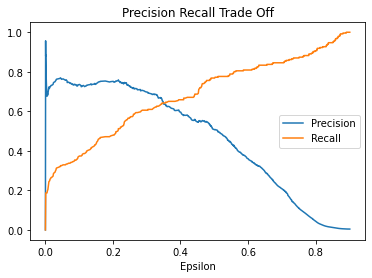

Best F1 Score 0.653928
Best Precision Score 0.684444
Best Recall Score 0.626016
Best Epsilon 0.3296473536265986


In [73]:
SelectThresholdByCV_Anomaly(p_X_val,Y_val)

In [74]:
def Print_Accuracy_Scores(y,y_pred):
    print("F1 Score: ", f1_score(y,y_pred))
    print("Precision Score: ", precision_score(y,y_pred))
    print("Recall Score: ", recall_score(y,y_pred))

In [75]:
pred_val = (p_X_val < 0.3296473536265986)
Print_Accuracy_Scores(Y_val, pred_val)

F1 Score:  0.6539278131634819
Precision Score:  0.6844444444444444
Recall Score:  0.6260162601626016


Text(0.5, 1.0, 'Normalized Confusion Matrix - Cross Validation')

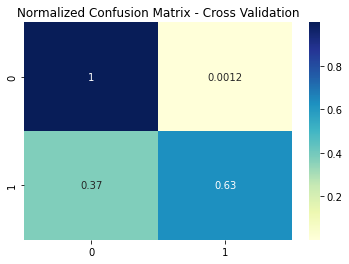

In [76]:
cnf_matrix = confusion_matrix(Y_val,pred_val)
row_sum = cnf_matrix.sum(axis=1,keepdims=True)
cnf_matrix_norm =cnf_matrix / row_sum 
sns.heatmap(cnf_matrix_norm,cmap='YlGnBu',annot=True)
plt.title("Normalized Confusion Matrix - Cross Validation")

In [92]:
pred_test = (p_X_test < 0.3296473536265986)
Print_Accuracy_Scores(Y_test,pred_test)

F1 Score:  0.645933014354067
Precision Score:  0.7848837209302325
Recall Score:  0.5487804878048781


Text(0.5, 1.0, 'Normalized Confusion Matrix - Test data')

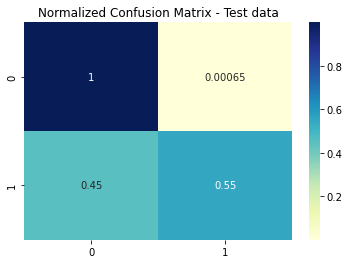

In [93]:
cnf_matrix = confusion_matrix(Y_test, pred_test)
row_sum = cnf_matrix.sum(axis=1,keepdims=True)
cnf_matrix_norm =cnf_matrix / row_sum 
sns.heatmap(cnf_matrix_norm,cmap='YlGnBu',annot=True)
plt.title("Normalized Confusion Matrix - Test data")pip install nbconvert


In [94]:
print('La cantidad de datos anomalos (Fraude) encontrados es:', sum(pred_test == True))

La cantidad de datos anomalos (Fraude) encontrados es: 172
